In [5]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)
X = fashion_mnist.data
y = fashion_mnist.target

scaler = StandardScaler()
X_std_full = scaler.fit_transform(X)

num_samples = X_std_full.shape[0]
num_samples_to_select = num_samples // 10

np.random.seed(0)
indices = np.random.choice(num_samples, num_samples_to_select, replace=False)

X_std = X_std_full[indices]
y_subset = y[indices]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
import numpy as np

U, S, Vt = np.linalg.svd(X_std, full_matrices=False)

W2 = Vt.T[:, :2]

X_pca = np.empty((X_std.shape[0], 2))
for i in range(X_std.shape[0]):
    for j in range(2):
        X_pca[i, j] = np.dot(X_std[i], W2[:, j])


In [7]:
def euclidean_distance_matrix(X):
    n_samples = X.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distance_matrix[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))
    return distance_matrix

distance_matrix = euclidean_distance_matrix(X_std)

In [9]:
import time
def mds(distance_matrix, dimensions=2, iterations=10):
    n_samples = distance_matrix.shape[0]
    coords = np.random.rand(n_samples, dimensions)
    for iteration in range(iterations):
        start_time = time.time()
        for i in range(n_samples):
            for j in range(i + 1, n_samples):
                dist_ij = np.sqrt(np.sum((coords[i] - coords[j])**2))
                if dist_ij == 0:
                    continue
                delta = (coords[i] - coords[j]) * (1 - distance_matrix[i, j] / dist_ij)
                coords[i] -= delta * 0.5
                coords[j] += delta * 0.5
        print(f"Iteration {iteration+1}/{iterations} completed in {time.time() - start_time:.2f} seconds")
    return coords

X_mds = mds(distance_matrix)

Iteration 1/10 completed in 414.81 seconds
Iteration 2/10 completed in 404.17 seconds
Iteration 3/10 completed in 409.19 seconds
Iteration 4/10 completed in 408.18 seconds
Iteration 5/10 completed in 393.32 seconds
Iteration 6/10 completed in 399.23 seconds
Iteration 7/10 completed in 391.08 seconds
Iteration 8/10 completed in 395.51 seconds
Iteration 9/10 completed in 397.52 seconds
Iteration 10/10 completed in 398.27 seconds


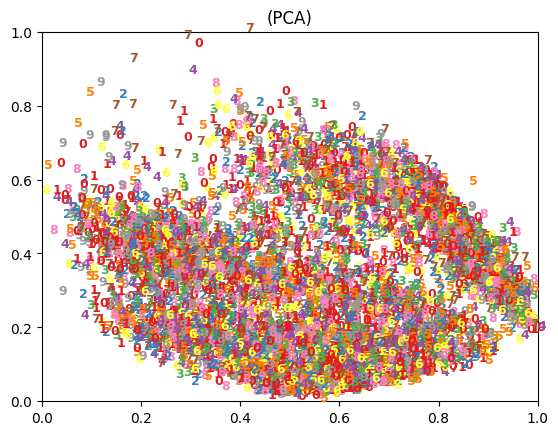

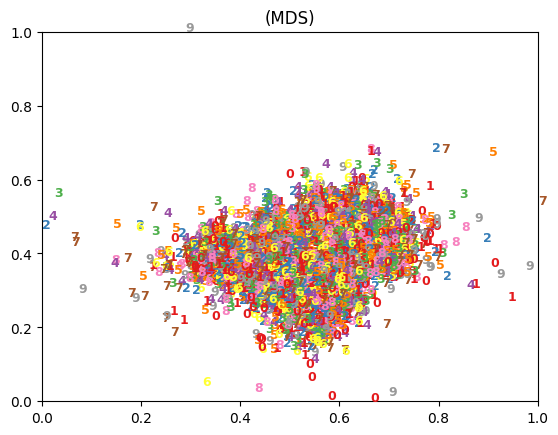

In [10]:
import matplotlib.pyplot as plt

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(int(y[i]) / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

plot_embedding(X_pca, "(PCA)")
plot_embedding(X_mds, "(MDS)")

plt.show()


In the PCA visualization, the Fashion MNIST dataset categories overlap significantly, indicating that the first two principal components do not fully capture the separability of different categories. PCA tends to preserve global structure but might not reveal local groupings clearly.

The MDS plot, however, shows a better structure with some clusters appearing more distinct than in the PCA. This is because MDS tries to preserve the pairwise distances between points, which can sometimes reveal the inherent clustering of the data more effectively than PCA.

Yet, neither method achieves perfect separation in two-dimensional space. This suggests the complexity of the dataset requires techniques that can capture more nuanced structures. Advanced methods like t-SNE or UMAP might be necessary for more distinct separation as they are designed to preserve local structures and can often reveal clusters that PCA and MDS might not.